<h2>Reading and Understanding Data</h2>

In [7]:
#Firstly importing libraries

# Data wrangling
import pandas as pd
import numpy as np

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model evaluation
from sklearn.model_selection import train_test_split

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [8]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [9]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
df = df.drop(['id'], axis=1)

<AxesSubplot:>

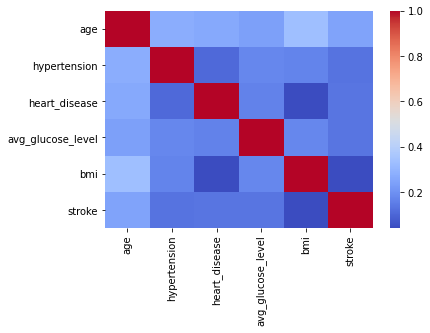

In [11]:
sns.heatmap(df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']].corr(), fmt = '.2f', cmap = 'coolwarm')

<h1>Data Preprocessing/ Data Cleaning:</h1>

In [12]:
# One Hot Encoding
gender = pd.get_dummies(df.gender)
df = pd.concat([df,gender], axis='columns')
ever_married = pd.get_dummies(df.ever_married)
df = pd.concat([df,ever_married], axis='columns')
work_type = pd.get_dummies(df.work_type)
df = pd.concat([df,work_type], axis='columns')
Residence_type = pd.get_dummies(df.Residence_type)
df = pd.concat([df,Residence_type], axis='columns')
smoking_status = pd.get_dummies(df.smoking_status)
df = pd.concat([df,smoking_status], axis='columns')

In [13]:
# Dropping unused features
df = df.drop(['gender','ever_married','work_type','Residence_type','smoking_status'],axis = 1)

In [14]:
# Checking for null(empty) values
df.isnull().sum().sort_values(ascending = False)

bmi                  201
age                    0
Never_worked           0
never smoked           0
formerly smoked        0
Unknown                0
Urban                  0
Rural                  0
children               0
Self-employed          0
Private                0
Govt_job               0
hypertension           0
Yes                    0
No                     0
Other                  0
Male                   0
Female                 0
stroke                 0
avg_glucose_level      0
heart_disease          0
smokes                 0
dtype: int64

In [15]:
# Since 'bmi' is missing values
# I used interpolate() to insert 
# values based on other values in df
df = df.interpolate()

In [16]:
# Removing outliers of a numerical feature
# In this case the average glucose Level
Q1 = df.avg_glucose_level.quantile(0.25)
Q3 = df.avg_glucose_level.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df = df[(df.avg_glucose_level>lower_limit)&(df.avg_glucose_level<upper_limit)]

In [17]:
# Removing outliers of a numerical feature
# In this case the bmi
Q1 = df.bmi.quantile(0.25)
Q3 = df.bmi.quantile(0.75)
IQR = Q3 - Q1
lower_limit2 = Q1 - 1.5*IQR
upper_limit2 = Q3 + 1.5*IQR
df = df[(df.bmi>lower_limit2)&(df.bmi<upper_limit2)]

<h1>Modeling</h1>

In [18]:
# Setting up features for the training/testing model
X = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level',
        'bmi', 'Female', 'Male', 'Other', 'No', 'Yes', 'Govt_job',
       'Never_worked', 'Private', 'Self-employed', 'children', 'Rural',
       'Urban', 'Unknown', 'formerly smoked', 'never smoked', 'smokes']]
y = df['stroke']

# Implemeting newly created variables ^^^
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2)


In [19]:
# Experimenting with different machine learing models
# and then testing the accuracy of each 

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

c:\users\sibis\anaconda3\envs\lrmodel\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


96.27

In [20]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

96.38

In [21]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0